# SymPy Tutorial

In [1]:
# Librerie
import sympy as smp
import numpy as np
from matplotlib import pyplot as plt
import scienceplots

plt.style.use(["science", "notebook", "grid"])

## Le basi

In SymPy è possibile definire e lavorare con variabili simboliche

In [2]:
x = smp.symbols("x")
x

x

In [3]:
x**2 # Potenza

x**2

In [4]:
gamma = smp.gamma(x) # Built-in functions
gamma

gamma(x)

E'possibile definire nuove espressioni simboliche a partire dalle variabili definite, per esempio

In [5]:
y = x**2 - 4 * x + 4
y * gamma

(x**2 - 4*x + 4)*gamma(x)

In [6]:
z = y**2
z

(x**2 - 4*x + 4)**2

## Fattorizzare / Espandere un'espressione  
Per fattorizzare un polinomio

In [7]:
y.factor()

(x - 2)**2

Per espandere un'espressione

In [8]:
z.expand()

x**4 - 8*x**3 + 24*x**2 - 32*x + 16

## Il metodo `smp.solve()`

`smp.solve(f, x)` trova il valore di $ x $ tale che $ f(x) = 0 $, è importante scrivere le equazioni in modo che il membro di destra sia $ 0 $ per risolvere un'espressione con `smp.solve()`

In [9]:
smp.solve(z, x)

[2]

In [10]:
smp.solve(smp.sin(x), x)

[0, pi]

### Specificare la natura di una variabile simbolica

**Good practice**: se si conosce la natura di una variabile (numero intero, numero reale, numero complesso, positivo, negativo, ...) è importante specificarla quando la si definisce, per evitare problemi. Per esempio

In [11]:
x = smp.symbols("x")
y = x**2 + 1
smp.solve(y, x) # soluzioni nel campo complesso

[-I, I]

In [12]:
# Se invece volessi le soluzioni nel campo dei numeri reali
x = smp.symbols("x", real = True)
y = x**2 + 1
smp.solve(y, x) # soluzioni nel campo reale

[]

Un altro esempio

In [13]:
x = smp.symbols("x", real = True)
y = x + 4
smp.solve(y, x)

[-4]

In [14]:
x = smp.symbols("x", real = True, positive = True)
y = x + 4
smp.solve(y, x) 

[]

## Espressioni in più variabili
Posso anche definire più variabili allo stesso tempo

In [15]:
x, y, z = smp.symbols("x y z")
F = x**2 + y * smp.sin(z)
F

x**2 + y*sin(z)

Si possono risolvere espressioni in più variabili allo stesso modo

In [16]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [17]:
y_sols = smp.solve(F, y)
y_sols

[-x**2/sin(z)]

In [18]:
z_sols = smp.solve(F, z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

## Trasformare le espressioni simboliche in funzioni di Python
E' possibile trasformare le espressioni simboliche di SymPy in funzioni di Python, per esempio per plottarle usando NumPy e MatPlotLib

In [19]:
expression = z_sols[0]
expression

asin(x**2/y) + pi

In [20]:
expression_f = smp.lambdify([x, y], expression)
expression_f(1, 2)

3.6651914291880923

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in arcsin
  return arcsin(x**2/y) + pi


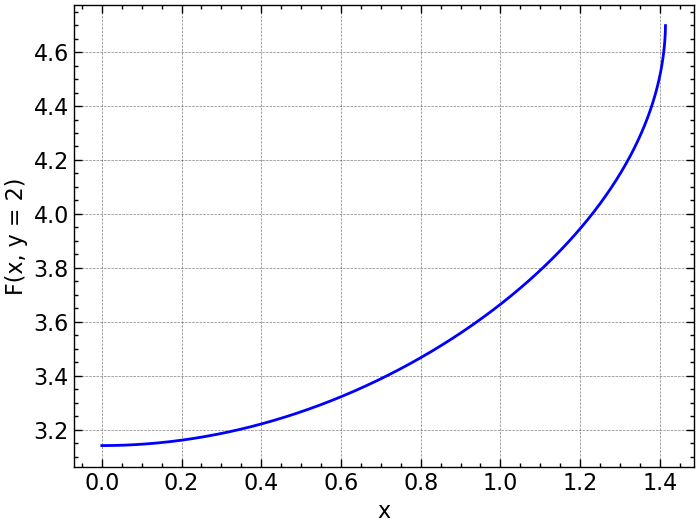

In [21]:
# Plot
x_min = 0.0
x_max = 5.0
x_coord = np.linspace(x_min, x_max, 10000)

fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.set_xlabel("x")
ax.set_ylabel("F(x, y = 2)")
ax.plot(x_coord, expression_f(x_coord, 2), color = "blue", label = "asin(x**2 / y) + pi")

plt.show()

## Sostituzioni
Per funzioni a più variabili, è possibile fare una sostituzione di valori

In [22]:
F

x**2 + y*sin(z)

In [23]:
F.subs([(y, smp.cos(z)), (z, smp.pi / 2)]) # sostituisce y con cos(z) e z con pi / 2

x**2

In [24]:
F.subs([(y, smp.cos(z)), (z, y)]) # sostituisce y con cos(z) e z con y

x**2 + sin(y)*cos(y)

## Esempio: sistema lineare di equazioni

Si vuole risolvere il seguente problema: un oggetto viene lanciato verso il basso a partire da un'altezza $ h_{0} $ con velocità $ v_{0} $ e ad un certo punto incontra una piattaforma che si sta muovendo verso l'alto con velocità $ v_{p} $

$$ h_{0}(t) = h_{0} - v_{0} t - \frac{1}{2} g t^{2} $$
$$ h_{p}(t) = v_{p} t + \frac{1}{2} a_{p} t^{2} $$

**Determina la velocità iniziale $ v_{0} $ dell'oggetto in caduta libera tale che, nel momento della collisione con la piattaforma, essi si muovano alla stessa velocità. Determina inoltre la velocità dei due corpi nel momento della collisione.**

Per risolvere il problema, si deve impostare un sistema di equazioni

\begin{equation*}
  \left\{ 
    \begin{aligned} 
      h_{0}(t) &= h_{p}(t) \\
      h'_{0}(t) &= -h'_{p}(t)
    \end{aligned} 
  \right.
\end{equation*}

Si porta tutto al primo membro per scrivere delle espressioni che possano essere risolte con SymPy

\begin{equation*}
  \left\{ 
    \begin{aligned} 
      h_{0}(t) - h_{p}(t) &= 0 \\
      h'_{0}(t) + h'_{p}(t) &= 0
    \end{aligned} 
  \right.
\end{equation*}

Si inizia definendo i simboli necessari

In [25]:
t, h_0, v_0, g, v_p, a_p = smp.symbols("t, h_0, v_0, g, v_p, a_p", real = True, positive = True)

Si definiscono le espressioni

In [26]:
h0_t = h_0 - v_0 * t - smp.Rational(1, 2) * g * t**2
hp_t = v_p * t + smp.Rational(1, 2) * a_p * t**2
h0_t_prime = smp.diff(h0_t, t)
hp_t_prime = smp.diff(hp_t, t)

Si definiscono le equazioni del sistema, ricordandosi di spostare tutto a primo membro

In [27]:
eq_1 = h0_t - hp_t
eq_2 = h0_t_prime + hp_t_prime

A questo punto si risolve il sistema

In [28]:
t_collision, v_iniziale = smp.solve([eq_1, eq_2], [t, v_0])[0] # Collezione di tuple, ciascuna avente due elementi, di cui viene presa la prima tupla
t_collision.simplify()

(2*v_p + sqrt(6*a_p*h_0 - 2*g*h_0 + 4*v_p**2))/(-3*a_p + g)

In [29]:
v_iniziale.simplify()

(v_p*(a_p + g) + (-a_p + g)*sqrt(6*a_p*h_0 - 2*g*h_0 + 4*v_p**2))/(3*a_p - g)

Per ottenere la velocità al momento della collisione

In [30]:
v_collisione_0 = h0_t_prime.subs([(t, t_collision), (v_0, v_iniziale)])
v_collisione_0.simplify()

(a_p*v_p - a_p*sqrt(6*a_p*h_0 - 2*g*h_0 + 4*v_p**2) - g*v_p)/(-3*a_p + g)

Per la piattaforma si trova lo stesso risultato con segno opposto

In [31]:
v_collisione_p = hp_t_prime.subs([(t, t_collision), (v_0, v_iniziale)])
v_collisione_p.simplify()

(-a_p*v_p + a_p*sqrt(6*a_p*h_0 - 2*g*h_0 + 4*v_p**2) + g*v_p)/(-3*a_p + g)

## Esempio: Analisi 1

### Limiti

$$ \lim_{x \to \pi}{\sin{\left(\frac{x}{2} + \sin{(x)}\right)}}

In [32]:
x = smp.symbols("x")
expr = smp.sin(x / 2 + smp.sin(x))
smp.limit(expr, x, smp.pi)

1

### Derivate

$$ \frac{d}{dx} \left(\frac{1 + \sin{(x)}}{1 - \cos{(x)}}\right)^{2} $$

In [33]:
expr = ((1 + smp.sin(x)) / (1 - smp.cos(x)))**2
smp.diff(expr, x).simplify()

2*(-sqrt(2)*cos(x + pi/4) + 1)*(sin(x) + 1)/(cos(x) - 1)**3

Una possibilità che si rivela estremamente utile è quella di poter lavorare con funzioni astratte. Per esempio, se volessi calcolare la derivata

$$ \frac{d}{dx} f(x + g(x)) $$

In [34]:
f, g = smp.symbols("f g", cls = smp.Function)
g = g(x) # Bisogna specificare l'argomento delle funzioni
f = f(x + g)
f

f(x + g(x))

In [35]:
df_dx = smp.diff(f, x)
df_dx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

Ora per esempio si può fare una sostituzione $ g(x) = sin(x) $

In [36]:
df_dx.subs([(g, smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

E per calcolare esplicitamente tutte le derivate di $ g $ è necessario chiamare il metodo `doit()`

In [37]:
df_dx.subs([(g, smp.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

### Integrali indefiniti

**Nota bene**: Si deve aggiungere $ + C $

$$ \int{\csc{(x)} \cot{(x)} dx} $$

In [38]:
expr = smp.csc(x) * smp.cot(x)
smp.integrate(expr, x)

-1/sin(x)

### Integrali definiti

$$ \int_{0}^{\log{(4)}}{\frac{e^{x}}{\sqrt{e^{2x} + 9}} dx}

In [39]:
expr = smp.exp(x) / smp.sqrt(smp.exp(2 * x) + 9)
limits = (x, 0, smp.log(4))
smp.integrate(expr, limits)

-asinh(1/3) + asinh(4/3)

$$ \int_{1}^{t}{x^{10} e^{x} dx} $$

In [40]:
expr = x**10 * smp.exp(x)
limits = (x, 1, t)
smp.integrate(expr, limits)

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## Esempio: atomo di idrogeno
La funzione d'onda dell'atomo di idrogeno è definita da

$$ \psi_{nlm} = R_{nl}(r) Y_{l}^{m}(\theta, \phi) $$

dove $ Y_{l}^{m}(\theta, \phi) $ sono le armoniche sferiche e $ R_{nl} $ rappresenta la parte radiale, data da

$$ R_{nl}(r) = \sqrt{\left(\frac{2}{na}\right)^{3} \frac{(n - l - 1)!}{2n(n + l)!}} e^{-\frac{r}{na}} \left(\frac{2r}{na}\right)^{l} L_{n - l - 1}^{2l + 1}(2r / na) $$

dove $ a $ è il raggio di Bohr, mentre $ L_{n - l - 1}^{2l + 1} $ sono i polinomi associati di Laguerre. Si vuole trovare il valore di aspettazione della distanza di un elettrone dal nucleo, dato un certo livello energetico, 

$$ \left<r\right> = \int_{0}^{+\infty}{R_{nl}^{2} r^{3} dr} $$
    
$$ \sigma = \sqrt{\left<r^{2}\right> - \left<r\right>^{2}} = \sqrt{\left(\int_{0}^{+\infty}{R_{nl}^{2} r^{4} dr}\right) - \left(\int_{0}^{+\infty}{R_{nl}^{2} r^{3} dr}\right)^{2}} $$

Si definiscono le variabili del problema

In [41]:
r, a = smp.symbols("r a", real = True, positive = True)
n, l = smp.symbols("n l", integer = True, positive = True)

Si definisce la parte radiale

In [42]:
R = smp.sqrt((2 / (n * a))**3 * (smp.factorial(n - l - 1) / (2 * n * smp.factorial(n + l)))) * smp.exp(-(r / (n * a))) * ((2 * r) / (n * a))**l * smp.assoc_laguerre(n - l - 1, 2 * l + 1, (2 * r) / (n * a))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

Ground state $ n = 1 $, $ l = 0 $

In [43]:
R_10 = R.subs([(n, 1), (l, 0)])
R_10

2*exp(-r/a)/a**(3/2)

Per prima cosa, conviene scrivere l'integrale nella generica forma $ \int_{0}^{+\infty}{R_{nl}^{2} r^{k} dr} $ con $ k \in \mathbb{N} $

In [44]:
def compute_integral(n_val, l_val, k = 3):
    R_nl = R.subs([(n, n_val), (l, l_val)])
    integrand = R_nl**2 * r**k
    limits = (r, 0, smp.oo)
    return smp.integrate(integrand, limits)

A questo punto si può calcolare la distanza media dell'elettrone dal nucleo per un dato livello energetico. Per esempio, nel ground state

In [45]:
compute_integral(1, 0)

3*a/2

Analogamente per la deviazione standard

In [46]:
def compute_std(n_val, l_val):
    return smp.sqrt(compute_integral(n_val, l_val, k = 4) - (compute_integral(n_val, l_val, k = 3))**2)

In [47]:
compute_std(1, 0)

sqrt(3)*a/2

Usando il metodo `smp.lambdify()` è possibile per esempio plottare il valore di $ \left<r\right> $ in funzione di $ n $ con $ l = 0 $ fissato, in unità del raggio di Bohr (quindi $ a = 1 $)

In [48]:
def compute_mean_distance(n_val, l_val = 0):
    expr = compute_integral(n_val, l_val)
    expr_f = smp.lambdify([a], expr)
    return expr_f(1)

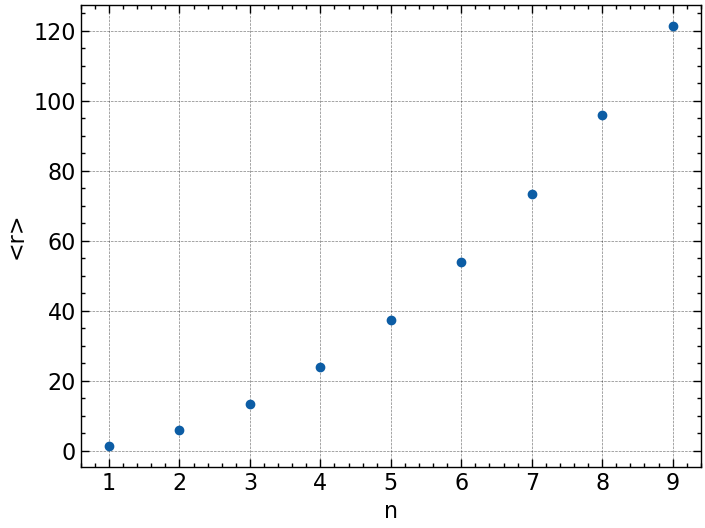

In [49]:
x_coord = np.arange(1, 10)
y_coord = [compute_mean_distance(n_i) for n_i in x_coord]

fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.set_xlabel("n")
ax.set_ylabel("<r>")

ax.scatter(x_coord, y_coord)
plt.show()

## Esempio: Analisi 2

In [50]:
x, y, z, u_1, u_2, u_3, v_1, v_2, v_3 = smp.symbols("x y z u_1 u_2 u_3 v_1 v_2 v_3") 

### Vettori

In [51]:
u = smp.Matrix([u_1, u_2, u_3])
v = smp.Matrix([v_1, v_2, v_3])

In [52]:
2*u + v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

#### Prodotto scalare

In [53]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

#### Prodotto vettoriale

In [54]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

#### Norma

In [55]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

#### Proiezioni

In [56]:
proj_v_u = (u.dot(v) / v.norm()**2) * v
proj_v_u 

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

#### Rette e piani

In [57]:
# Retta
r_0 = smp.Matrix([1, 1, 1])
v = smp.Matrix([1, 3, -1])
r = r_0 + t * v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

In [58]:
# Piano
P_0 = smp.Matrix([4, 4, 8])
r = smp.Matrix([x, y, z])
n = smp.Matrix([1, 1, 1])
n.dot(P_0 - r)

-x - y - z + 16

### Calcolo vettoriale
#### Curve

In [59]:
# Curva in R^3
r = smp.Matrix([3 * t, smp.sin(t), t**2])
r

Matrix([
[   3*t],
[sin(t)],
[  t**2]])

In [60]:
# Vettore velocità
smp.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

Per esempio: trova l'angolo $ \theta(t) $ tra velocità e accelerazione come funzione del tempo

In [61]:
v = smp.diff(r, t)
a = smp.diff(v, t)
theta_t = smp.acos(v.dot(a) / (v.norm() * a.norm())).simplify()
theta_t

acos((4*t - sin(2*t)/2)/(sqrt(sin(t)**2 + 4)*sqrt(4*t**2 + cos(t)**2 + 9)))

Trova l'angolo per $ t = 6 $

In [62]:
theta_t.subs([(t, 6)])

acos((24 - sin(12)/2)/(sqrt(sin(6)**2 + 4)*sqrt(cos(6)**2 + 153)))

Per valutarlo numericamente si usa il metodo `evalf()`

In [63]:
theta_t.subs([(t, 6)]).evalf()

0.251108015692338

### Integrali vettoriali

In [64]:
r = smp.Matrix([smp.exp(t) * smp.cos(t), t**4, 1 / (1 + t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [65]:
smp.Integral(r, t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

#### Lunghezza di una curva

$$ L = \int_{a}^{b}{\sqrt{\left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2 + \left(\frac{dz}{dt}\right)^2}} dt $$

In [66]:
r = smp.Matrix([0, t, t**2])
smp.integrate(smp.diff(r, t).norm(), (t, 0, 1)) # Integrale da 0 a 1

asinh(2)/4 + sqrt(5)/2

In [67]:
smp.integrate(smp.diff(r, t).norm(), (t, 0, 1)).evalf()

1.47894285754460

### Esempio: campo magnetico di un filo percorso da corrente
Il campo magnetico di un filo percorso da corrente in un punto dello spazio $ \vec{r} = (x, y, z) $ è dato da

$$ \vec{B}(\vec{r}) = \frac{\mu_{0}}{4 \pi} \int_{[a, b]}{\frac{I \frac{d \vec{l}}{dt} \times (\vec{r} - \vec{l})}{|| \vec{r} - \vec{l} ||^3}} dt $$

dove $ \vec{l} = (f(t), g(t), h(t)) $ è una curva nello spazio parametrizzata da $ t $ che definisce la posizione del filo.

In [68]:
# Si definiscono le variabili simboliche
x, y, z, t, I, mu_0 = smp.symbols("x y z t I mu_0", real = True)
f, g, h = smp.symbols("f g h", cls = smp.Function)
f = f(t)
g = g(t)
h = h(t)

# Si definiscono r, l e dl / dt
r = smp.Matrix([x, y, z])
l = smp.Matrix([f, g, h])
dl_dt = smp.diff(l)

# Si definisce l'integranda
dB_dt = I * dl_dt.cross(r - l) / (r - l).norm()**3
dB_dt

Matrix([
[I*(-(y - g(t))*Derivative(h(t), t) + (z - h(t))*Derivative(g(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[ I*((x - f(t))*Derivative(h(t), t) - (z - h(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[I*(-(x - f(t))*Derivative(g(t), t) + (y - g(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)]])

Ora per esempio si vuole calcolare il campo magnetico ad una distanza $ H $ al di sopra di una spira circolare di raggio $ R $, lungo il suo asse

In [69]:
# Si definiscono R e H
R, H = smp.symbols("R H", real = True)

# Si sostituiscono le espressioni f(t), g(t), h(t) per una spira circolare
dB_dt = dB_dt.subs([(f, R * smp.cos(t)), (g, R * smp.sin(t)), (h, 0), (x, 0), (y, 0), (z, H)])
dB_dt.simplify()
dB_dt

Matrix([
[                   H*I*R*cos(t)/(H**2 + R**2)**(3/2)],
[                   H*I*R*sin(t)/(H**2 + R**2)**(3/2)],
[I*R*(R*sin(t)**2 + R*cos(t)**2)/(H**2 + R**2)**(3/2)]])

Per trovare il campo magnetico $ \vec{B} $ in $ \vec{r} $ si integra

In [70]:
result = (mu_0 / (4 * smp.pi)) * smp.integrate(dB_dt, (t, 0, 2 * smp.pi))
result

Matrix([
[                                   0],
[                                   0],
[I*R**2*mu_0/(2*(H**2 + R**2)**(3/2))]])

### Derivate parziali

In [71]:
x, y, z = smp.symbols("x y z")

Derivate parziali di $ f(x, y) = y^2 \sin(x + y) $

In [72]:
f = y**2 * smp.sin(x + y)
smp.diff(f, x)

y**2*cos(x + y)

In [73]:
smp.diff(f, y)

y**2*cos(x + y) + 2*y*sin(x + y)

Per le derivate seconde miste, per esempio $ \frac{\partial^2 f}{\partial x \partial y^2} $

In [74]:
smp.diff(f, y, y, x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

#### Regola della catena
Si assume che $ x $, $ y $, $ z $ siano funzioni di $ t $ e che $ w $ sia funzione di $ x $, $ y $ e $ z $ 

In [84]:
t = smp.symbols("t")
x, y, z, w, v = smp.symbols("x y z w v", cls = smp.Function)

Si vuole trovare $ \frac{dw}{dt} $

In [85]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

In [86]:
w

w(x(t), y(t), z(t))

SymPy applica automaticamente la regola della catena

In [87]:
smp.diff(w, t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Per esempio, data $ w_{0}(x(t), y(t), z(t)) = x^2(t) + e^{y(t)} \sin(z(t)) $, dove
$$ x(t) = \sin(t) $$
$$ y(t) = \cos(t) $$
$$ z(t) = t^2 $$

In [89]:
w_0 = x**2 + smp.exp(y) * smp.sin(z)
smp.diff(w_0, t).subs([(x, smp.sin(t)), (y, smp.cos(t)), (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

### Integrali multipli
Per esempio, si vuole risolvere

$$ I = \int_{0}^{1} dx \int_{0}^{1 - x^2} dy \int_{3}^{4 - x^2 - y^2} x dz $$

In [90]:
x, y, z = smp.symbols("x y z")
limits_x = (x, 0, 1)
limits_y = (y, 0, 1 - x**2)
limits_z = (z, 3, 4 - x**2 - y**2)
smp.integrate(x, limits_z, limits_y, limits_x)

1/8